In [6]:
# !pip install descartes
# !pip install geopandas
# !pip install pyreadr==0.4.1

In [1]:
# Load libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pyreadr

In [2]:
chicago_map = gpd.read_file('../data/chicago/chicago.shp')

In [3]:
# Load spray.csv
spray = pd.read_csv('../data/clean_spray.csv')
train = pd.read_csv('../data/clean_train.csv')

In [4]:
spray['year'] = spray['year'].apply(str)
spray['month'] = spray['month'].apply(str)
spray['day'] = spray['day'].apply(str)
spray['month'] = spray['month'].replace(['5','6','7','8','9','10'],['05','06','07','08','09','10'])

In [5]:
def make_year(date):
    return date.split('-')[0]
#split the month of a date input
def make_month(date):
    return date.split('-')[1]
#split the day of a date input
def make_day(date):
    return date.split('-')[2]

def lowercase_cols(columns):
    return [column.lower() for column in columns]

# Make time column
def set_time(time):
    return 


def clean_dates(df):
    df['year'] = df.date.apply(make_year)
    df['month'] = df.date.apply(make_month)
    df['day'] = df.date.apply(make_day)
    df.drop(['date',], axis = 1, inplace = True)
    df.columns = lowercase_cols(df.columns)
    return df


In [6]:
clean_dates(train)

,species,street,latitude,longitude,nummosquitos,wnvpresent,year,month,day
0,CULEX PIPIENS/RESTUANS,N OAK PARK AVE,41.954690,-87.800991,1,0,2007,05,29
1,CULEX RESTUANS,N OAK PARK AVE,41.954690,-87.800991,1,0,2007,05,29
2,CULEX RESTUANS,N MANDELL AVE,41.994991,-87.769279,1,0,2007,05,29
3,CULEX PIPIENS/RESTUANS,W FOSTER AVE,41.974089,-87.824812,1,0,2007,05,29
4,CULEX RESTUANS,W FOSTER AVE,41.974089,-87.824812,4,0,2007,05,29
...,...,...,...,...,...,...,...,...,...
10501,CULEX PIPIENS/RESTUANS,W 72ND ST,41.763733,-87.742302,6,1,2013,09,26
10502,CULEX PIPIENS/RESTUANS,N RIDGE AVE,41.987280,-87.666066,5,0,2013,09,26
10503,CULEX PIPIENS/RESTUANS,N ASHLAND AVE,41.912563,-87.668055,1,0,2013,09,26
10504,CULEX PIPIENS/RESTUANS,N HARLEM AVE,42.009876,-87.807277,5,0,2013,09,26


In [7]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14294 entries, 0 to 14293
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  14294 non-null  int64  
 1   date        14294 non-null  object 
 2   latitude    14294 non-null  float64
 3   longitude   14294 non-null  float64
 4   year        14294 non-null  object 
 5   month       14294 non-null  object 
 6   day         14294 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 781.8+ KB


In [8]:
spray.head()

,Unnamed: 0,date,latitude,longitude,year,month,day
0,0,2011-08-29,42.391623,-88.089163,2011,08,29
1,1,2011-08-29,42.391348,-88.089163,2011,08,29
2,2,2011-08-29,42.391022,-88.089157,2011,08,29
3,3,2011-08-29,42.390637,-88.089158,2011,08,29
4,4,2011-08-29,42.390410,-88.088858,2011,08,29


In [9]:
crs = {'init':'epsg:4326'}

geometry_train = [Point(xy) for xy in zip(train['longitude'], train ['latitude'])]
geo_train_df = gpd.GeoDataFrame(train,crs=crs, geometry = geometry_train)


geometry_spray =[Point(xy) for xy in zip(spray['longitude'],spray['latitude'])]
geo_spray_df = gpd.GeoDataFrame(spray, crs=crs, geometry = geometry_spray)



/Users/jean/miniconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [10]:
##Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
##Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

station = pd.DataFrame({
    'station':['ORD','MDW'],
    'latitude':[41.995,41.786],
    'longitude':[-87.933,-87.752]
})

geometry_station = [Point(xy) for xy in zip(station['longitude'],station['latitude'])]

geo_station_df = gpd.GeoDataFrame(station, crs=crs, geometry = geometry_station)

geo_station_df.head()

,station,latitude,longitude,geometry
0,ORD,41.995,-87.933,POINT (-87.93300 41.99500)
1,MDW,41.786,-87.752,POINT (-87.75200 41.78600)


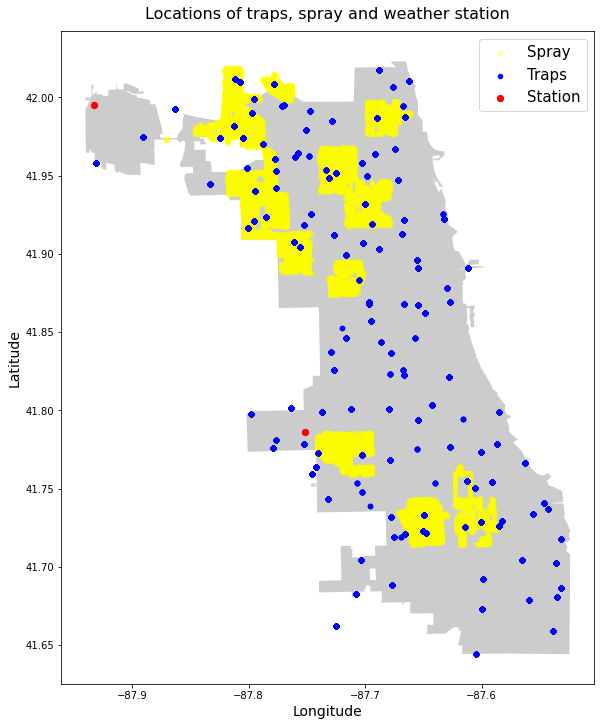

In [15]:
##Plot map of sprays, traps, and weather stations
fig, ax = plt.subplots(figsize=(12,12))
chicago_map.plot(ax = ax, alpha = .4, color = 'grey')
geo_spray_df[geo_spray_df['latitude'] < 42.1].plot(
    ax = ax, markersize = 20, color = 'yellow', marker ='o', alpha = .3, label ='Spray')
geo_train_df.plot(ax=ax, markersize=20, color='blue', marker='o', label='Traps')
geo_station_df.plot(ax=ax, markersize=40, color='red', marker='o', label='Station')
plt.legend(prop={'size': 15})
plt.title('Locations of traps, spray and weather station', fontsize=16, y=1.01)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

plt.savefig('../images/Location_trap_spray_weather.png')
plt.show()

In [16]:
train.head()

,species,street,latitude,longitude,nummosquitos,wnvpresent,year,month,day,geometry
0,CULEX PIPIENS/RESTUANS,N OAK PARK AVE,41.954690,-87.800991,1,0,2007,05,29,POINT (-87.80099 41.95469)
1,CULEX RESTUANS,N OAK PARK AVE,41.954690,-87.800991,1,0,2007,05,29,POINT (-87.80099 41.95469)
2,CULEX RESTUANS,N MANDELL AVE,41.994991,-87.769279,1,0,2007,05,29,POINT (-87.76928 41.99499)
3,CULEX PIPIENS/RESTUANS,W FOSTER AVE,41.974089,-87.824812,1,0,2007,05,29,POINT (-87.82481 41.97409)
4,CULEX RESTUANS,W FOSTER AVE,41.974089,-87.824812,4,0,2007,05,29,POINT (-87.82481 41.97409)


In [17]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14294 entries, 0 to 14293
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  14294 non-null  int64   
 1   date        14294 non-null  object  
 2   latitude    14294 non-null  float64 
 3   longitude   14294 non-null  float64 
 4   year        14294 non-null  object  
 5   month       14294 non-null  object  
 6   day         14294 non-null  object  
 7   geometry    14294 non-null  geometry
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 893.5+ KB


/Users/jean/miniconda3/lib/python3.8/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/jean/miniconda3/lib/python3.8/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


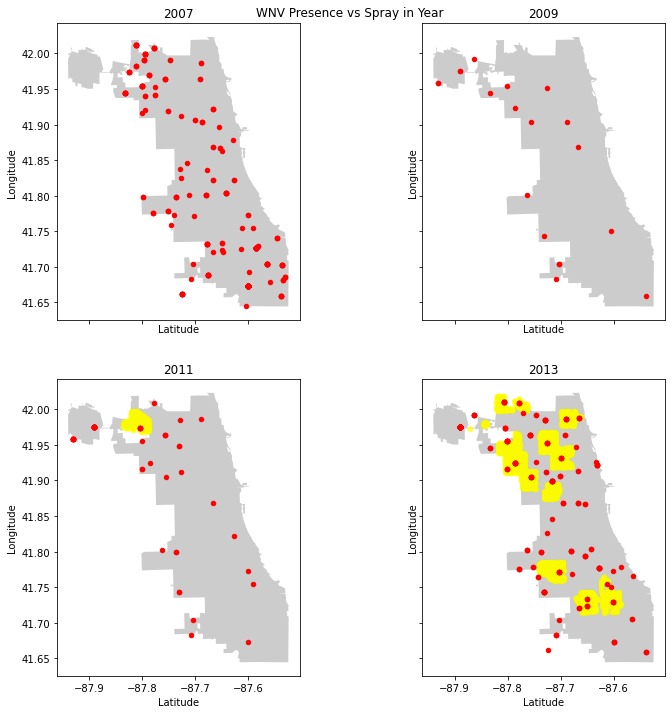

In [21]:
##Plot graphs by year for where wnvpresent and locations sprayed
fig, ax = plt.subplots(figsize=(12,12), nrows =2, ncols = 2,sharex = True, sharey = True)
ax = ax.ravel()

mask_wnvpresent = geo_train_df['wnvpresent'] == 1
mask_outliers = geo_spray_df['latitude'] < 42.3
for i,y in enumerate(train.year.unique()):

    chicago_map.plot(ax = ax[i], color = 'grey', alpha = 0.4)
    
    geo_spray_df[mask_outliers & (geo_spray_df['year'] == y)].plot(ax=ax[i], markersize = 20, color = 'yellow', marker = 'o', alpha = .2, label = 'Spray')
    geo_train_df[mask_wnvpresent & (geo_train_df['year'] == y)].plot(ax=ax[i], markersize = 20, color = 'red', marker = 'o', label = 'Virus')
    

    ax[i].set_title(y)
    ax[i].set_xlabel('Latitude')
    ax[i].set_ylabel('Longitude')

plt.suptitle('WNV Presence vs Spray in Year',y=0.9)
plt.savefig('../images/wnvpresence_by_year.png')
plt.show()

In [23]:
#2011
fig, ax = plt.subplots(nrows=3,ncols =2, figsize=(12,12),sharex = True, sharey = True)
ax = ax.ravel()
spray_month = ['07','08','09']

for i,y in enumerate(train.month.unique()):
    for item in spray_month:
        chicago_map.plot(ax = ax[i], color = 'grey', alpha = 0.4)
        geo_spray_df[mask_outliers & (geo_spray_df['year'] == '2011') & (geo_spray_df['month'] == y)].plot(ax= ax[i], markersize = 20, color = 'yellow',marker ='o', alpha = .2, label = 'Spray')
        geo_train_df[mask_wnvpresent & (geo_train_df['month'] == y) & (geo_train_df['year'] == "2011") ].plot(ax = ax[i], markersize = 20, color = 'red',marker = 'o',label ='Virus')

    else:
        chicago_map.plot(ax = ax[i], color = 'grey', alpha = 0.4)
        geo_spray_df[mask_outliers & (geo_spray_df['year'] == '2011')].plot(ax= ax[i], markersize = 20, color = 'yellow',marker ='o', alpha = .2, label = 'Spray')
        geo_train_df[mask_wnvpresent & (geo_train_df['year'] == "2011")].plot(ax = ax[i], markersize = 20, color = 'red',marker = 'o',label ='Virus')

    ax[i].set_title(y)
    ax[i].set_xlabel('Longitude', fontsize=14)
    ax[i].set_ylabel('Latitude', fontsize=14)

SyntaxError: invalid syntax (<ipython-input-23-8d65c815b405>, line 14)

In [114]:
train.month.unique()

array(['05', '06', '07', '08', '09', '10'], dtype=object)

In [115]:
    geo_train_df[mask_wnvpresent & (geo_train_df['month'] == y) & (geo_train_df['year'] == 2011) ].plot(ax = ax[i], markersize = 20, color = 'red',marker = 'o',label ='Virus')


/root/venv/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


<AxesSubplot:title={'center':'2013'}, xlabel='Latitude', ylabel='Longitude'>

In [116]:
train.month.unique()

array(['05', '06', '07', '08', '09', '10'], dtype=object)

In [117]:
fig, ax = plt.subplots(figsize=(12,12))
chicago_map.plot(ax = ax, color = 'grey', alpha = 0.4)


geo_spray_df[mask_outliers & (geo_spray_df['year']== "2011") & (geo_spray_df['month'] == "10")].plot(ax= ax, markersize = 20, color = 'yellow',marker ='o', alpha = .2, label = 'Spray')
geo_train_df[mask_wnvpresent & (geo_train_df['year'] == '2011') & (geo_train_df['month'] == '10')].plot(ax = ax, markersize = 20, color = 'red', marker = 'o')

/root/venv/lib/python3.7/site-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 864x864 with 1 Axes>

In [118]:
spray.head()

,Unnamed: 0,time,latitude,longitude,year,month,day,geometry
0,0,6:56:58 PM,42.391623,-88.089163,2011,08,29,POINT (-88.08916 42.39162)
1,1,6:57:08 PM,42.391348,-88.089163,2011,08,29,POINT (-88.08916 42.39135)
2,2,6:57:18 PM,42.391022,-88.089157,2011,08,29,POINT (-88.08916 42.39102)
3,3,6:57:28 PM,42.390637,-88.089158,2011,08,29,POINT (-88.08916 42.39064)
4,4,6:57:38 PM,42.390410,-88.088858,2011,08,29,POINT (-88.08886 42.39041)


In [119]:
geo_train_df['month'].unique()

array(['05', '06', '07', '08', '09', '10'], dtype=object)

In [120]:
geo_spray_df['month'].unique()

array(['08', '09', '07'], dtype=object)

# Cluster

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [122]:
#testing clustering geo locations

In [151]:
geo_train = geo_train_df.copy()

In [152]:
#with 5 clusters for chicago state location
k = 5

#initiate ss
ss = StandardScaler()
X_sc = ss.fit_transform(geo_train.loc[:, ['longitude','latitude']])

In [141]:
# scores = []
# for k in range(40, 100):
#     cl = KMeans(n_clusters=k)
#     cl.fit(X_sc)
#     inertia = cl.inertia_
#     sil = silhouette_score(X_sc, cl.labels_)
#     scores.append([k, inertia, sil])
    
# score_df = pd.DataFrame(scores)
# score_df.columns = ['k', 'inertia', 'silhouette']

In [142]:
# fig, axes = plt.subplots(1, 2, figsize=(14, 7))
# axes[0].plot(score_df.k, score_df.inertia)
# axes[0].set_title('Inertia over k')
# axes[1].plot(score_df.k, score_df.silhouette);
# axes[1].set_title('Silhouette Score over k')

In [153]:
#initiate kmeans
km = KMeans(n_clusters=k, random_state=42)
km.fit(X_sc)
geo_train['cluster'] = km.labels_ 

In [154]:
geo_train.head()

,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,year,month,day,geometry,cluster
0,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,05,29,POINT (-87.80099 41.95469),4
1,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,05,29,POINT (-87.80099 41.95469),4
2,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007,05,29,POINT (-87.76928 41.99499),4
3,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,05,29,POINT (-87.82481 41.97409),4
4,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007,05,29,POINT (-87.82481 41.97409),4


In [148]:
#init geodf on long and lat with cluster information
crs = {'init':'epsg:4326'}

test_df = [Point(xy) for xy in zip(geo_train['longitude'], geo_train['latitude'])]
geo_json = gpd.GeoDataFrame(geo_train,crs=crs, geometry = test_df)

/root/venv/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

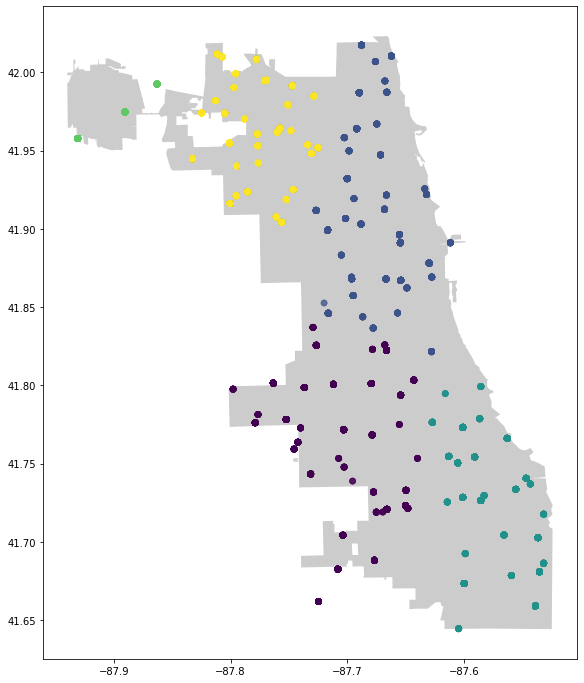

In [149]:
#visualize cluster
fig, ax = plt.subplots(figsize=(12,12))
chicago_map.plot(ax = ax, alpha = .4, color = 'grey', zorder=1)
# geo_train.plot(ax=ax, markersize=50, color='red', marker='o', label='Cluster',zorder=2)
geo_json.plot(ax=ax,column='cluster',alpha=0.5, cmap='viridis', linewidth=0.8, zorder=2)


In [155]:
#test model with cluster instead of lat long and block
test_clus = pd.DataFrame(geo_train[['cluster','block']])

In [158]:
test_clus.to_csv('./data/testing_cluster_model.csv',index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bf97d729-91d2-44aa-ae54-5374473494d2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>